# **People Analytics.**

## Predecir la probabilidad de que un candidato busque un nuevo trabajo.

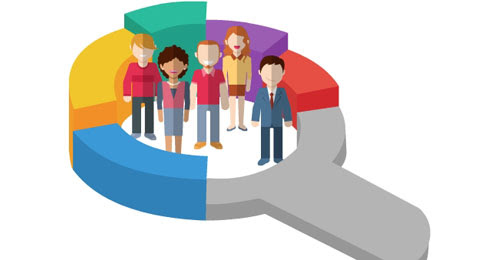

**Objetivo**

Predecir la probabilidad de que un candidato trabaje para la empresa, despues de la formación o busque un nuevo trabajo.
Interpretar el (los) modelo (s) de tal manera que ilustre qué características afectan la decisión del candidato


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

  0 – Not looking for job change,
  
  1 – Looking for a job change. ABANDONO.



<a name="init"></a>
<h1> MI TFM</h1>


<dl>
  <dt><a href="#carga_datos">1. Importación de librerias y Carga de datos</a></dt>
      <dd>Breve Introducción del dataset</dd>
    
  <dt><a href="#target">2. Target</a></
  </dt>
      <dd>Problema Machine Learning: Clasificación. Datos desbalanceados</dd>
    
  <dt><a href="#split_train_test">3. Detección de anomalías</a></dt>
      <dd>Missings. Duplicados. Eliminación de features. Outliers</dd>
    
  <dt><a href="#analisis">4. Análisis y limpieza de los datos</a></dt>
      <dd>Tratamiento de los missings. Análisis de las univariables y de las bivariables.</dd>
    
  <dt><a href="#ML">5. Empezamos Machine Learning</a></dt>
      <dd>Train, Test/ EStandarizacion / Binarización de variables.</dd>

  <dt><a href="#SIN">6. Modelling sin undersampling </a></dt>
      <dd>Cross validation/ Entrenamiento del mejor modelo/ Accuracy score /F-Measure /ROC score</dd>

  <dt><a href="#CON">7. Modelling CON undersampling </a></dt>
      <dd>Cross validation/ Entrenamiento del mejor modelo/ Accuracy score /F-Measure /ROC score</dd>
    
  <dt><a href="#Final">8. CONCLUSION </a></dt>

  <dt><a href="#prediccion">9. PREDICCIÓN DEL MODELO. </a></dt>
      
</dl>

<a name="carga_datos"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 1. Importación de librerias y Carga de datos.
Breve Introducción del dataset.

<img src="./img/ml_types.png" alt="drawing" width="650"/>



In [1]:
# Importamos Librerias.

# data analysis and wrangling
import pandas as pd
import numpy as np
import random 

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip /content/RRHH_Proyecto_final.zip

Archive:  /content/RRHH_Proyecto_final.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [3]:
# Load dataset train 
df= pd.read_csv('aug_train.csv')

In [4]:
df.sort_values(["enrollee_id"])# comprobamos que en esta variable faltan valores.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
6730,2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
10024,4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
15817,5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
4552,7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0


In [5]:
# eliminamos la columna enrolle_id ya que no nos aporta ningun valor y faltan algunos valores .
df.drop(["enrollee_id"], axis = 'columns', inplace=True)


In [6]:
df.columns # vemos el nombre de las columnas de este dataset.

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

**Features**

* enrollee_id : ID único del candidato.

* city: código de ciudad.

* city_ development _index :  índice de desarrollo de la ciudad (escalado).

* gender: género del candidato.

* relevent_experience: experiencia relevante del candidato.

* enrolled_university: tipo de curso universitario inscrito, si lo hubiera.

* education_level: nivel de educación del candidato.

* major_discipline :disciplina principal de educación del candidato.

* experience: Experiencia total del candidato en años.

* company_size: Número de empleados en la empresa del empleador actual

* company_type : tipo de empleador actual.

* lastnewjob: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.

* training_hours: horas de formación completadas.

* target: 0 - No busca un cambio de trabajo, 1 - Busca un cambio de trabajo.



In [7]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 19158 Rows
Dataset has 13 Cols


In [8]:
 # Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64



<a name="target"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 2. Target
Problema Machine Learning: Clasificación. Datos desbalanceados.

<img src="./img/ml_types.png" alt="drawing" width="650"/>


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

   0 - No busco cambio de trabajo,
  
   1 - Buscando un cambio de trabajo.

Tenga en cuenta que el conjunto de datos no está equilibrado en la variable. Para corregir este desbalance haremos un undersampling, ya que necesitamos corregir target =1.

El 75% de los inscritos no parecía un cambio de trabajo

25% de los inscritos buscan un cambio de trabajo


Estamos ante un  problema de Clasificación, ya que el target del problema es un conjunto de valores discretos binarios( el empleado no busca/ Busca un nuevo empleo).


0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


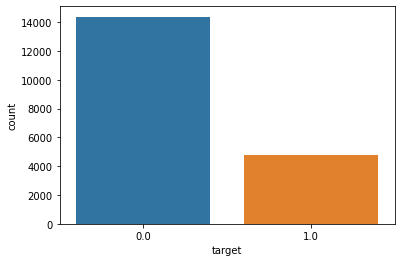

In [9]:
# Visualizamos variable objetivo.
sns.countplot(x=df['target']);
print(df.target.value_counts(normalize=True))


<a name="split_train_test"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 3. Detección de anomalías.

  Missings. Duplicados. Eliminación de features. Outliers

<img src="./img/ml_types.png" alt="drawing" width="650"/>


In [10]:
# Detección de los valores nulos por variables.

null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
9,company_type,6140,32.05
8,company_size,5938,30.99
2,gender,4508,23.53
6,major_discipline,2813,14.68
5,education_level,460,2.40
10,last_new_job,423,2.21
4,enrolled_university,386,2.01
7,experience,65,0.34
0,city,0,0.00
1,city_development_index,0,0.00


In [11]:
# Comprobamos si hay alguna fila duplicada y en su caso las eliminamos.
df.duplicated().sum()


49

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()# comprobamos que se han eliminado correctamente todos los valores duplicados.


0

### OUTLIERS.

¿Qué es un outlier?
Se trata de un valor atípico dentro de nuestros datos. Un valor que se desvía mucho de las métricas estadísticas de centralidad (media, moda, mediana). En el análisis exploratorio de datos suele ser algo a estudiar, el por qué tengo algunos valores atípicos en los datos. No obstante, en machine learning los outliers en los datos implican penalizaciones en los modelos, sobretodo los que trabajan con distancias y con Gradient Descent. Por tanto, hay que lidiar con ellos.

Nuestras dos únicas variables numéricas hasta ahora cuentas con outliers. 

Simplemente he realizad una imputación a estos.

*   training_hours
*   city_ development _index 


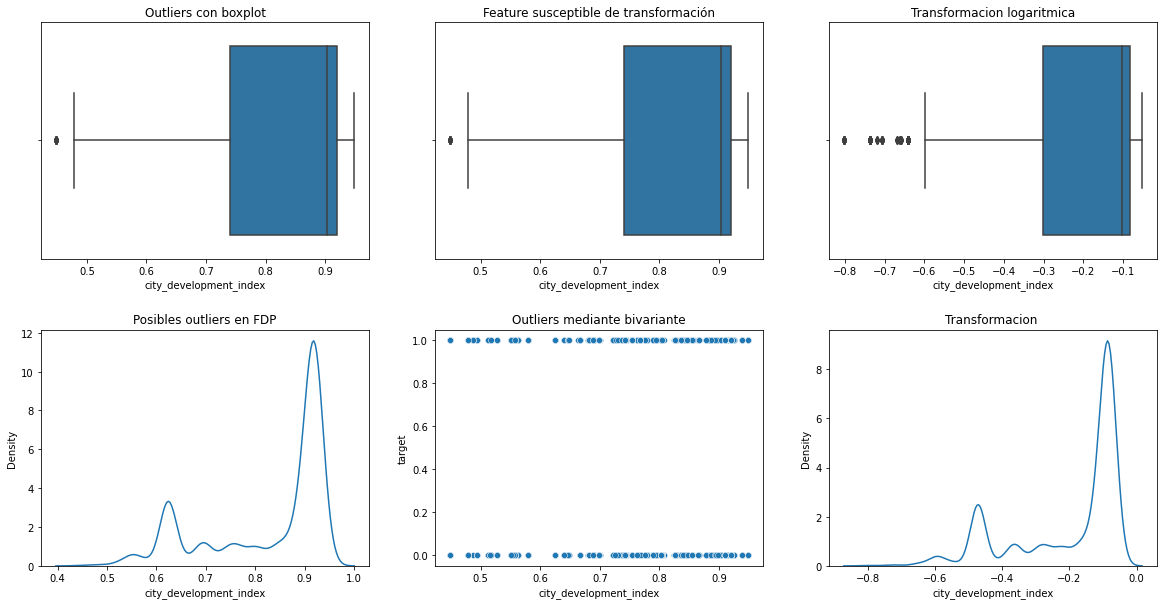

In [13]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['city_development_index'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['city_development_index'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['city_development_index']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['city_development_index'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='city_development_index', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["city_development_index"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

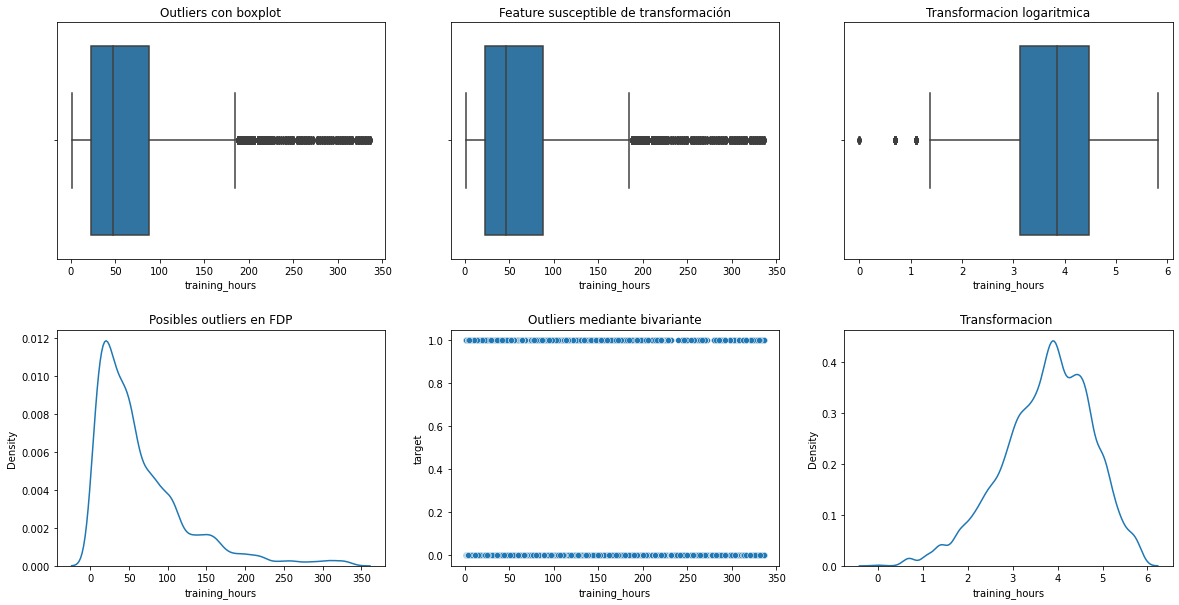

In [14]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['training_hours'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['training_hours'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['training_hours']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['training_hours'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='training_hours', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["training_hours"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

In [15]:
from collections import Counter

#drop the label 
outlier_list = ['city_development_index', 'training_hours'] 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
        
        #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
df = df.drop(detect_outlier(df,outlier_list),axis=0).reset_index(drop=True)


<a name="analisis"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 4. Análisis y limpieza de los datos 

  Estudio detallado variable por variable.

  Tratamiento de los missings.

  Análisis de las univariables y de las bivariables.


<img src="./img/ml_types.png" alt="drawing" width="650"/>


### City: código de ciudad.

In [16]:
df['city'].unique().tolist()# comprobamos los valores de esta variable.


['city_103',
 'city_40',
 'city_21',
 'city_115',
 'city_162',
 'city_176',
 'city_160',
 'city_46',
 'city_61',
 'city_114',
 'city_13',
 'city_159',
 'city_102',
 'city_67',
 'city_100',
 'city_16',
 'city_71',
 'city_104',
 'city_64',
 'city_101',
 'city_83',
 'city_105',
 'city_73',
 'city_75',
 'city_41',
 'city_11',
 'city_93',
 'city_90',
 'city_36',
 'city_20',
 'city_57',
 'city_152',
 'city_19',
 'city_65',
 'city_74',
 'city_173',
 'city_136',
 'city_98',
 'city_97',
 'city_50',
 'city_138',
 'city_82',
 'city_157',
 'city_89',
 'city_150',
 'city_70',
 'city_175',
 'city_94',
 'city_28',
 'city_59',
 'city_165',
 'city_145',
 'city_142',
 'city_26',
 'city_12',
 'city_37',
 'city_43',
 'city_116',
 'city_23',
 'city_99',
 'city_149',
 'city_10',
 'city_45',
 'city_80',
 'city_128',
 'city_158',
 'city_123',
 'city_7',
 'city_72',
 'city_106',
 'city_143',
 'city_78',
 'city_109',
 'city_24',
 'city_134',
 'city_48',
 'city_144',
 'city_91',
 'city_146',
 'city_133',
 'city_

In [17]:
len(df['city'].unique().tolist())# tenemos sede en 123 ciudades.


123

Como es una columna que tiene demasiados valores (123) y no tiene información relevante, la eliminamos.  Como la siguiente columna está relacionada con la geografía y nos aporta más valor, nos quedamos con la siguiente.


In [18]:
df.drop(['city'], axis=1,inplace=True)


### City_development_index : índice de desarrollo de la ciudad (escalado).


In [19]:
df['city_development_index'].unique().tolist()# comprobamos los valores de esta variable.


[0.92,
 0.7759999999999999,
 0.624,
 0.789,
 0.767,
 0.764,
 0.762,
 0.913,
 0.926,
 0.8270000000000001,
 0.843,
 0.804,
 0.855,
 0.887,
 0.91,
 0.884,
 0.924,
 0.6659999999999999,
 0.5579999999999999,
 0.923,
 0.794,
 0.754,
 0.939,
 0.55,
 0.865,
 0.698,
 0.893,
 0.7959999999999999,
 0.866,
 0.682,
 0.802,
 0.579,
 0.878,
 0.897,
 0.949,
 0.925,
 0.8959999999999999,
 0.836,
 0.693,
 0.769,
 0.775,
 0.903,
 0.555,
 0.727,
 0.64,
 0.516,
 0.743,
 0.899,
 0.915,
 0.6890000000000001,
 0.895,
 0.89,
 0.847,
 0.527,
 0.7659999999999999,
 0.738,
 0.647,
 0.795,
 0.74,
 0.701,
 0.493,
 0.84,
 0.691,
 0.735,
 0.742,
 0.479,
 0.722,
 0.921,
 0.848,
 0.856,
 0.898,
 0.83,
 0.73,
 0.68,
 0.725,
 0.556,
 0.448,
 0.763,
 0.745,
 0.645,
 0.7879999999999999,
 0.78,
 0.512,
 0.7390000000000001,
 0.563,
 0.518,
 0.8240000000000001,
 0.487,
 0.649,
 0.7809999999999999,
 0.625,
 0.807,
 0.664]

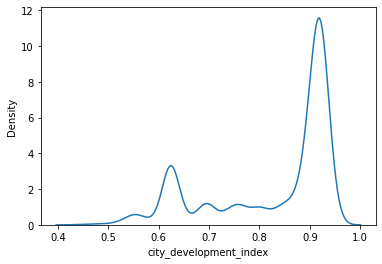

In [20]:
# Comprobamos que el mayor numero de poblaciones tienes alrededor de un 90% de indice de desarrollo.
# Los indices de desarrollo van del 50% al 93 %. Alrededor del 60% también hay un repunte.
sns.kdeplot(data=df, x="city_development_index")


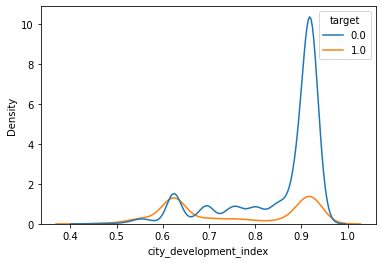

In [21]:
# Aquí podemos ver que las personas que viven en ciudades desarrolladas tienen una menor probabilidad de cambiar de trabajo.
sns.kdeplot(data=df, x="city_development_index", hue="target")


En el siguiente gráfico podemos ver que más personas de ciudades con un índice de desarrollo bajo están buscando un cambio de trabajo porque  están menos satisfechas con su trabajo actual o con el lugar en el que viven.


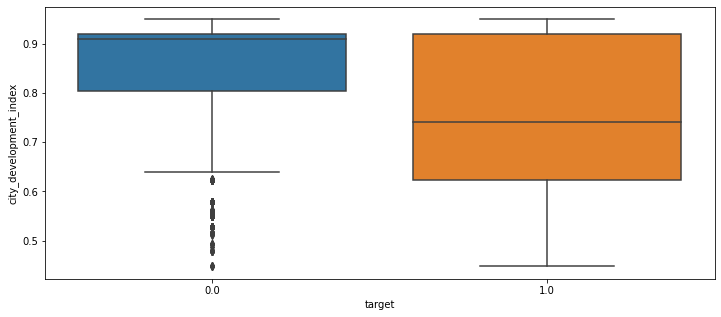

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='Looking for job'
ylabel = 'city_development_index'

### Gender.


In [23]:
# Trabajamos con los valores nulos de esta columna.
df['gender'].value_counts()

Male      13173
Female     1237
Other       191
Name: gender, dtype: int64

Text(0, 0.5, 'Número')

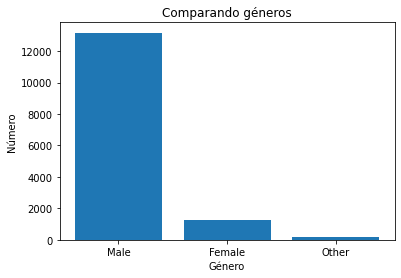

In [24]:
# VISUALIZAMOS LA COLUMNA GENERO.
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['gender'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Comparando géneros') 
ax.set_xlabel('Género') 
ax.set_ylabel('Número')


In [25]:
df['gender'].isna().sum()# Trabajamos con los valores nulos de esta columna.


4508

In [26]:
# Rellenamos los valores Nan de la columna gender con valores aleatorios masculinos, femeninos a la vez.

from random import choice

mask = df["gender"].isna()

df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["Male","Female"]))

In [27]:
# como vemos nos quedan todavia algunos valores "Other".
df['gender'].value_counts()

Male      15459
Female     3459
Other       191
Name: gender, dtype: int64

In [28]:
df['gender'].isna().sum()

0

In [29]:
# los valores de sexo "Other", son reemplazados por el valor minoritario , para desbalancear un poco.
df['gender'].replace({"Other": "Female"}, inplace=True)


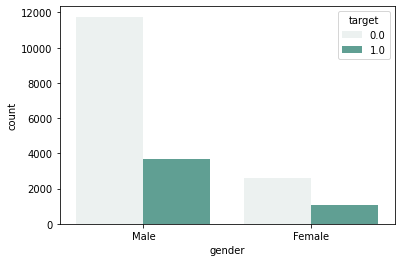

In [30]:
# Visualizamos la columna genero:  target: 0 – Not looking for job change, 1 – Looking for a job change.
# la mayoria de hombre, No buscan un nuevo trabajo. 
# Pero vemos la diferencia abismal que hay entre hombres y mujeres que buscan un nuevo trabajo.
# La diferencia entre los que se quedan en la empresa y los que buscan un nuevo trabajo, para los hombres es mayor. 
#Mientras que esta diferencia entre mujeres es mas sutil.

sns.countplot(x=df.gender, hue=df.target, palette='light:#5A9')

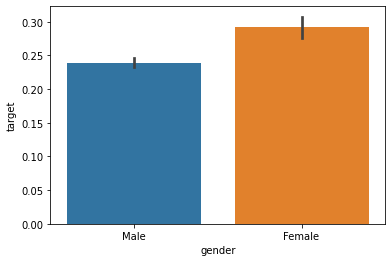

In [31]:
sns.barplot(x="gender", y="target", data=df)
plt.show()
# Mayor porcentaje de mujeres estan buscando un nuevo trabajo-

In [32]:
# Binarizamos male y female feature.
df['Sex_bin'] = df['gender']
df = df.replace({'Sex_bin': {'Male': 0, 'Female': 1}})
df.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Sex_bin
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0
3,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1


In [33]:
# Eliminamos la columna NO Binarizada.
df.drop(['gender'], axis=1,inplace=True)


### Relevent_experience: experiencia relevante del candidato.


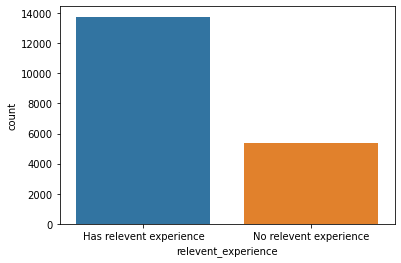

In [34]:
sns.countplot(x=df.relevent_experience)
# Podemos comprobar que la gran mayoria de los candidatos poseen experiencia relevante.

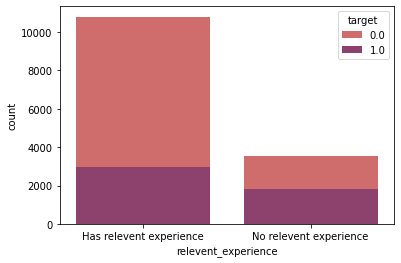

In [35]:
# la mayoria de personas que tiene experiencia , NO  buscan un trabajo nuevo.
sns.countplot(x=df.relevent_experience, hue=df.target, palette='flare', dodge=False) # dodge me permite apilar

In [36]:
pd.crosstab(df['relevent_experience'], df['Sex_bin'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos las columnas en tanto por ciento.
# Podemos ver que en 75 % de los hombres tiene experiencia relevante frente a un 25%.
# y la diferencia para las mujeres es menor, un 20% menos. La diferencia de la experiencia relevante  entre las mujeres esta mas homogeneizada.


Sex_bin,0,1
relevent_experience,,
Has relevent experience,73.555857,65.150685
No relevent experience,26.444143,34.849315


In [37]:
# Binarizamos Relevent_ experience
df['relev_exp_bin'] = df['relevent_experience']
df = df.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})


In [38]:
#Eliminamos la columna ya binarizada.
df.drop(['relevent_experience'], axis=1,inplace=True)


### Education Level: nivel de educación del candidato.


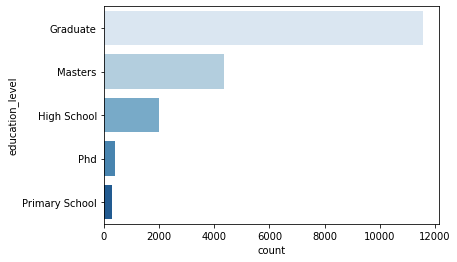

In [39]:
sns.countplot(y= df['education_level'], palette="Blues") 
# Comprobamos que el mayor número de trabajadores poseen un Grado Universitario.

In [40]:
# en esta variable teniamos algunos valores nulos.
df['education_level'].isna().sum()


460

In [41]:
# Rellenamos los valores nulos de esta variable con el valor intermedio, para seguir manteniendo las proporciones.
df['education_level'].fillna('High School', inplace=True)

In [42]:
df['education_level'].isna().sum()


0

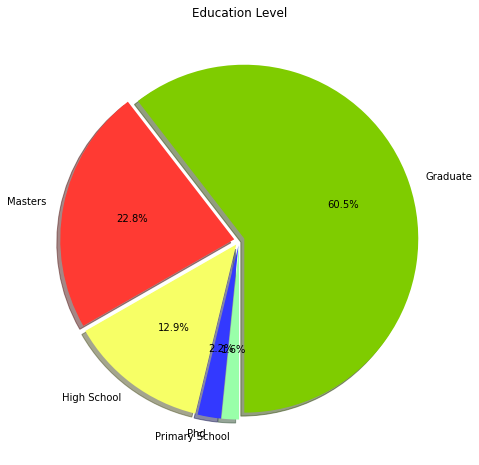

In [43]:
# Visualizamos el gráfico de una forma diferente.
labels = list(df["education_level"].value_counts().index)
values = list(df["education_level"].value_counts().values)

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%",
        colors=["#7fcc00", "#ff3a33", "#f7ff66", "#3339ff", "#99ffa9"],
        shadow=True, explode = [0.03, 0.03, 0.03, 0.03, 0.03],
        startangle=270)
plt.title("Education Level");

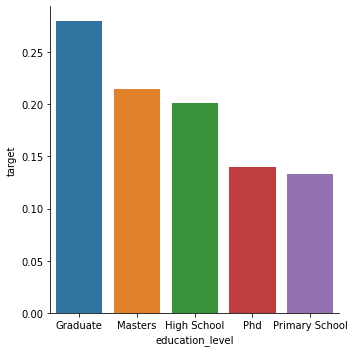

In [44]:
# Comparamos esta variable con la variable objetivo.
sns.catplot(x="education_level", y="target", data=df, kind="bar", ci=None)
# Comprobamos que el mayor numero de personas buscando un nuevo empleo son Graduadas.

### Enrolled_university: tipo de curso universitario inscrito, si lo hubiera.


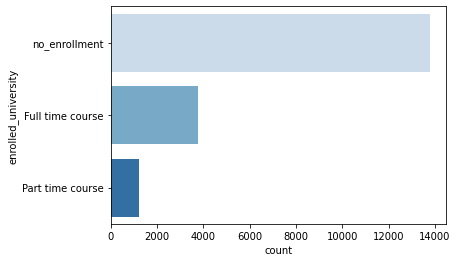

In [45]:
sns.countplot(y= df['enrolled_university'], palette="Blues")
 # Comprobamos esta variable.

No le encuentro sentido a esta variable, ya que el mayor numero de empleados era graduados y aqui aparece  como no apuntandos a la universidad, asi que elimino esta columna.


In [46]:
df.drop(['enrolled_university'],axis=1,inplace=True) 


### Major discipline: disciplina principal de educación del candidato.


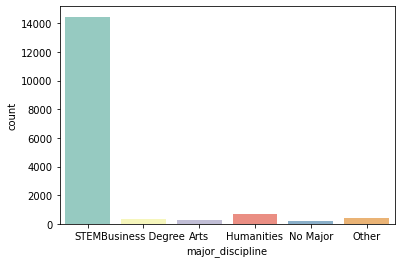

In [47]:
sns.countplot(x=df.major_discipline, palette="Set3")# visualizamos la variable.

In [48]:
# Mayor discipline_ STEM; SCIENCE.
# comparamos esta variable con la variable objetivo
pd.crosstab(index=df["major_discipline"],
                        columns=df["target"], margins=True)


target,0.0,1.0,All
major_discipline,,,
Arts,200,53,253
Business Degree,241,86,327
Humanities,528,141,669
No Major,168,55,223
Other,279,102,381
STEM,10667,3780,14447
All,12083,4217,16300


In [49]:
pd.crosstab(df['major_discipline'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos la comparacion relativa en tanto por ciento


target,0.0,1.0
major_discipline,,
Arts,1.655218,1.256818
Business Degree,1.994538,2.039364
Humanities,4.369776,3.343609
No Major,1.390383,1.304245
Other,2.309029,2.418781
STEM,88.281056,89.637183


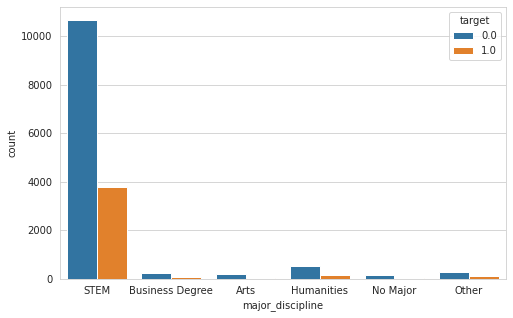

In [50]:
# Mayor discipline_ Visualizamos comparando esta variable con el objetivo.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df)

In [51]:
# esta variable la elimino ya que  el ratio con respecto a la variable objetivo no me aporta mucho valor al modelo.
df.drop(['major_discipline'], axis=1,inplace=True)


### Experience: Experiencia total del candidato en años.


In [52]:
df['experience'].isna().sum()

65

In [53]:
# rellenamos los valores nulos de esta variable.
df['experience'].fillna("0", inplace=True)

In [54]:
df['experience'].isna().sum()

0

In [55]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [56]:
# Convertimos la columna de 'experience' en valores númericos.
df["experience"] = pd.to_numeric(df["experience"])

In [57]:
df["experience"].dtypes

dtype('int64')

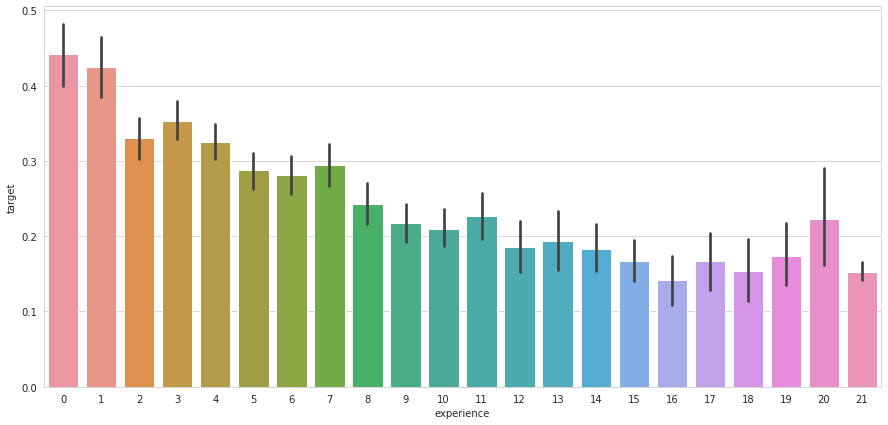

In [58]:
# Comparamos esta variable con la variable objetivo. Observamos una tendecia descendiente.
# A mas años de experiencia, menos probabilidad de buscar un nuevo trabajo.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="experience", y="target", data=df)

In [59]:
# Realizamos la discretización del atributo Experience con pd.cut y bins / labels a medida
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df['años_experiencia'] = pd.cut(df["experience"], bins=bins, labels=labels)

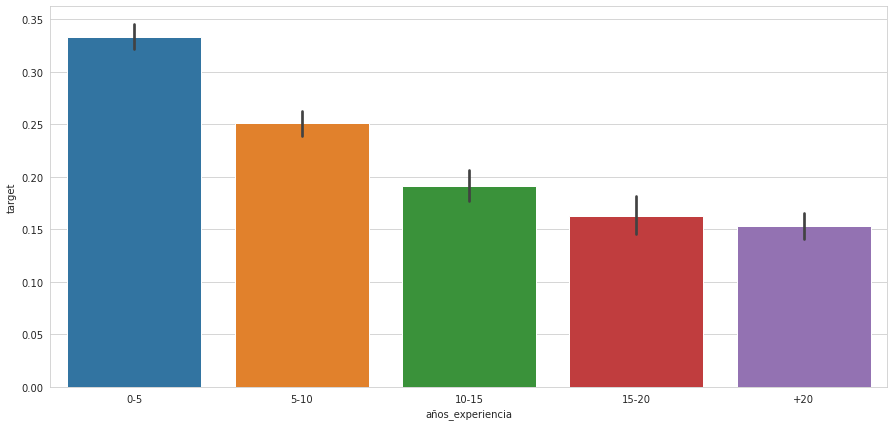

In [60]:
# Comparamos esta variable con la variable objetivo, y observamos la tendencia.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="años_experiencia", y="target", data=df)

In [61]:
# Eliminamos columnas ya discretizadas,  para no  repetirlas.
df.drop(['experience'], axis=1,inplace=True)


In [62]:
df['años_experiencia'].isna().sum()

586

### company_size: Número de empleados en la empresa del empleador actual.

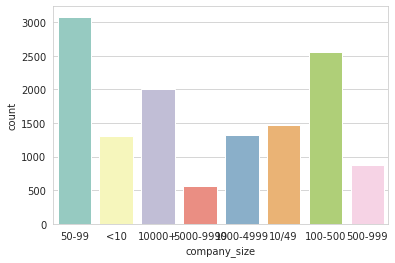

In [63]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos de esta variable.

In [64]:
# Missing values.
df['company_size'].isna().sum()

5920

In [65]:
# Rellenamos los valores NAN de esta columna copiando los valores de la celda anterior y posterior.
df['company_size'].fillna(method='ffill', limit=1, inplace=True)


In [66]:
df['company_size'].fillna(method='bfill', limit=1, inplace=True)

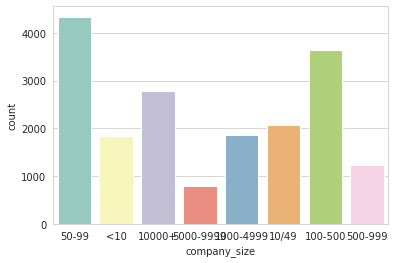

In [67]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos despues de la limpieza.

In [68]:
# Missing values.
df['company_size'].isna().sum()

537

In [69]:
pd.crosstab(df['company_size'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# Comparamos esta variable con la variable objetivo
# Tenemos la comparación en tanto por ciento


target,0.0,1.0
company_size,,
10/49,10.446486,13.579157
100-500,19.774977,18.944579
1000-4999,10.396639,8.920291
10000+,15.089368,14.903952
50-99,23.314107,23.537205
500-999,6.736452,6.270700
5000-9999,4.165777,4.438066
<10,10.076195,9.406050


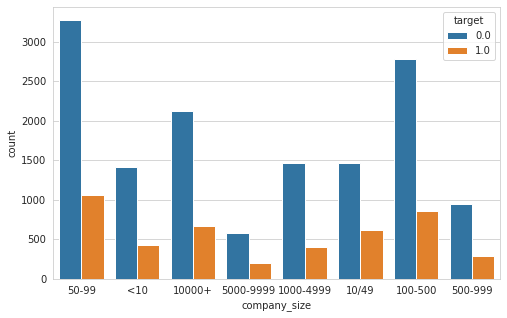

In [70]:
# Visualizamos esta comparación.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

Discretizamos esta variable para reducir valores en :grande , mediana y pequeña empresa.

In [71]:
# reemplazo los valores de esta variable, en vez de por intervalo por 
df['company_size'] = df.company_size.replace({'50-99':"Mediana",
"<10":"Pequeña",
"10000+":"Gran_empresa",
"5000-9999": "Gran_empresa",
"1000-4999":"Gran_empresa",
"10/49":"Pequeña",
"100-500":"Mediana",
"500-999":"Gran_empresa"})


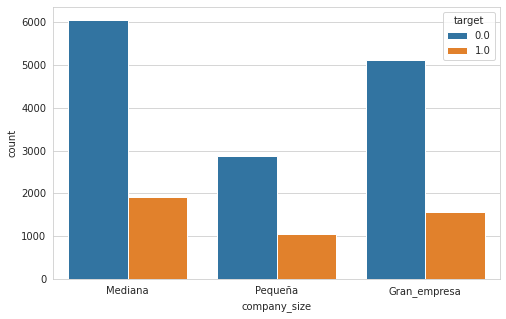

In [72]:
#Comprobamos que el mayor numero de persona que buscan o no trabajo, se encuentran en la mediana empresa.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

In [73]:
# Reemplazamos valores nulos con la variable minoritaria para desbalancear.
df['company_size'] = df.company_size.fillna("Pequeña")


In [74]:
# Missing values.
df['company_size'].isna().sum()

0

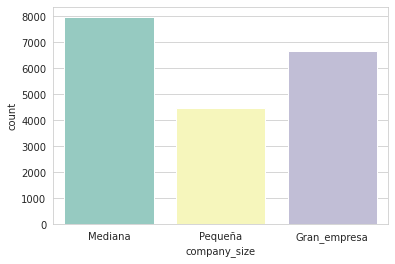

In [75]:
sns.countplot(x=df.company_size, palette="Set3")

### Company Type: tipo de empleador actual.

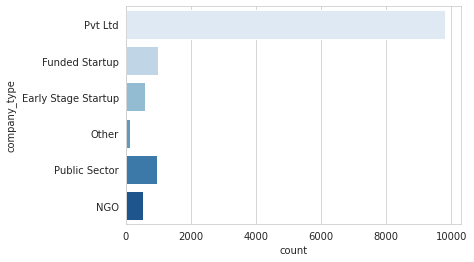

In [76]:
# Visualizamos los datos.
sns.countplot(y= df['company_type'], palette="Blues") # invertimos el eje
# Sociedad de responsabilidad limitada (Private limited company)


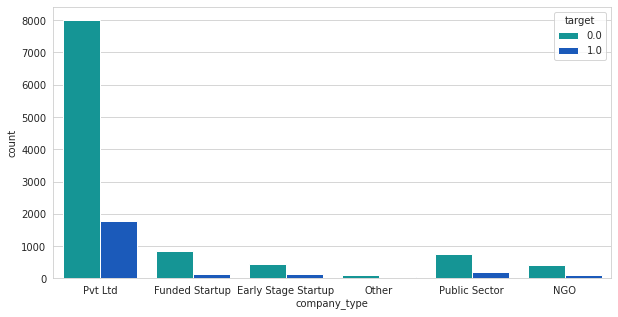

In [77]:
# comparamos con la variable.
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=df,palette='winter_r')

In [78]:
# esta variable tiene mas de un 30% de valores nulos.
df['company_type'].isna().sum()# Trabajamos con los valores nulos de esta columna.


6122

In [79]:
df['company_type'].isnull().sum()/len(df)*100 # observamos por valor relativo

32.03725992987597

In [80]:
# asi que eliminamos esta variable.
df.drop(['company_type'], axis=1,inplace=True)


### Last new job: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.


In [81]:
# Missing values
df['last_new_job'].fillna('never', inplace=True)

In [82]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [83]:
# Convertimos la columna de 'experience' en valores númericos.
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

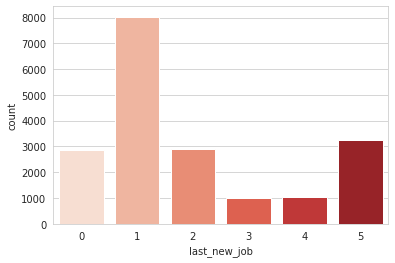

In [84]:
sns.countplot(x=df.last_new_job, palette="Reds")
# comprobamos que el mayor numero de candidatos, tenian un año de experiencia en su puesto de trabajo anterior.

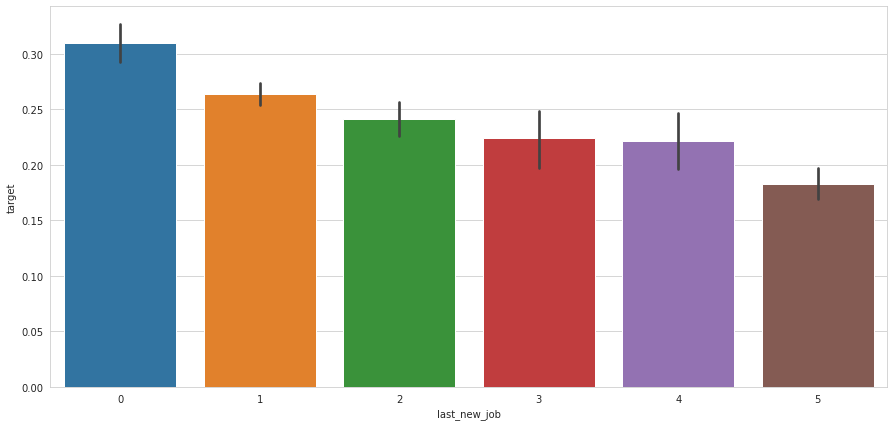

In [85]:
plt.figure(figsize= [15.0, 7.0])# en esta gráfica podemos observar como el porcentaje de personas que buscan un nuevo empleo se va reduciendo conforme tiene mas años en su puesto de trabajo.
sns.barplot(x="last_new_job", y="target", data=df)

### Training hours: horas de formación completadas.


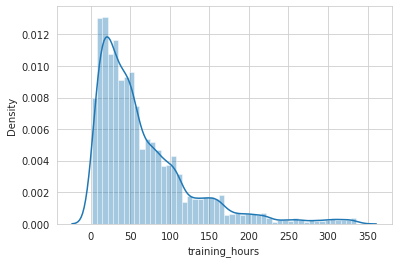

In [86]:
sns.distplot(df.training_hours);
# Visualizamos esta variable , podemos comprobar que el mayor numero de formación , se encuentra entre 0 y 50 horas completadas.

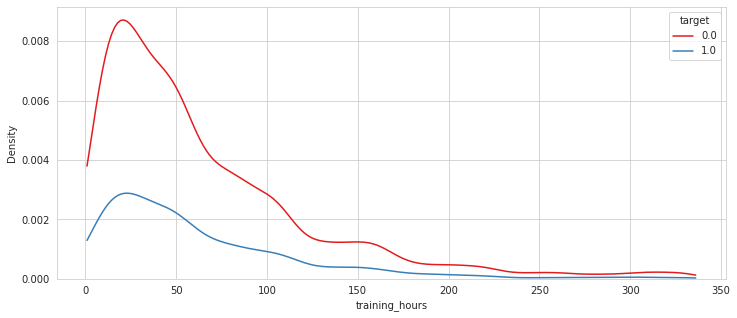

In [87]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='Set1')
# Aquí podemos ver que solo a unos pocos empleados se les ha ofrecido una capacitación de más de 100 horas.
# podemos comprobar que a mayor formación, menor ratio de abandono.


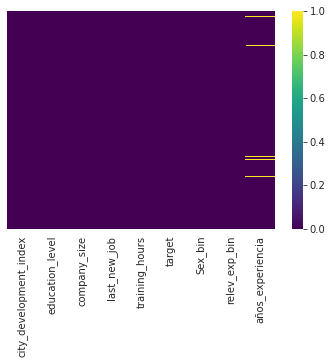

In [88]:
# COMPROBAMOS QUE NO QUEDAN VALORES NULOS.
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [89]:
# Eliminamos los pocos valores nulos que nos quedan.
df.dropna(inplace=True)


<a name="ML"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 5. Empezamos Machine Learning</a></dt>
  Train, Test

<img src="./img/ml_types.png" alt="drawing" width="650"/>


Estandarización y binarización de variables categóricas.

In [90]:
# data estandarizacion
cols_to_standarize = ['training_hours','last_new_job']
for col in cols_to_standarize:
  df[col] = preprocessing.scale(df[col], axis=0, copy=False)

In [91]:
# get dummies
categorical_feature = (df.dtypes == "category") | (df.dtypes == object)
categorical_cols = df.columns[categorical_feature].tolist()
df = pd.get_dummies(df, columns=categorical_cols)

In [92]:
# correlacion 
correlation_matrix = df.corr()

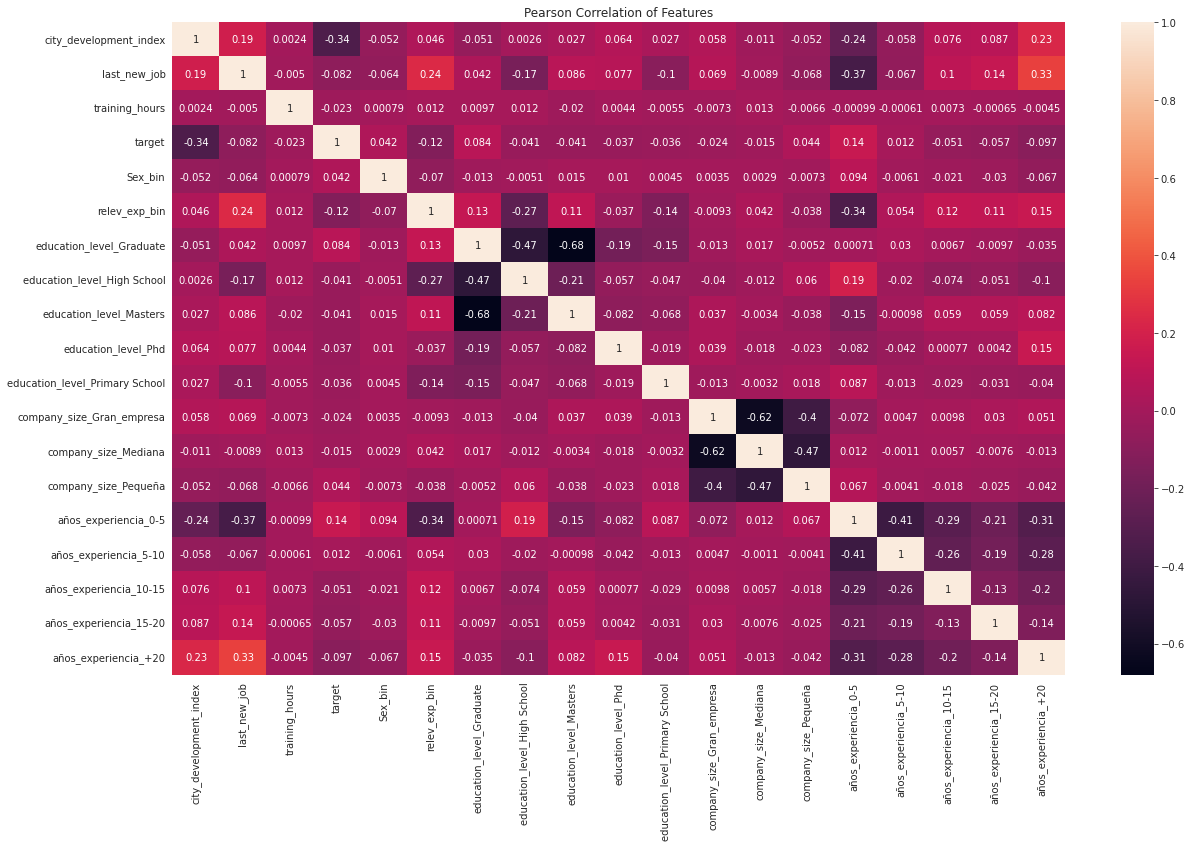

In [93]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [94]:
# Mostrar las 5 features con mejor coeficiente de correlación
corr = df.corr()
print(corr['target'].sort_values(ascending=False)[:6], '\n')
print(corr['target'].sort_values(ascending=False)[-6:])

target                      1.000000
años_experiencia_0-5        0.142191
education_level_Graduate    0.083538
company_size_Pequeña        0.044109
Sex_bin                     0.042244
años_experiencia_5-10       0.011608
Name: target, dtype: float64 

años_experiencia_10-15   -0.051255
años_experiencia_15-20   -0.057014
last_new_job             -0.081973
años_experiencia_+20     -0.097006
relev_exp_bin            -0.124589
city_development_index   -0.335072
Name: target, dtype: float64


Selecionamos las mejores variables con el método **SelectKBest**.

In [95]:
# hago una copia , para despues hacer otra versión de los modelos con undersampling
df1=df

In [96]:
# Realizamos el train_test_split 80-20
X = df.drop(['target'], axis = 1)
y = df['target']

In [97]:
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(X, y)

scores = sorted(zip(map(lambda x: round(x, 4), selector.scores_), X.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'target']).head(6)

,Score,target
0,2342.3958,city_development_index
1,382.1923,años_experiencia_0-5
2,292.0214,relev_exp_bin
3,175.9425,años_experiencia_+20
4,130.1585,education_level_Graduate
5,125.2963,last_new_job


DEfinimos la X y la Y con las mejores variables.

In [98]:
X=df[['city_development_index','años_experiencia_0-5','relev_exp_bin','años_experiencia_+20','education_level_Graduate','last_new_job']]

In [99]:
y = df['target']



<a name="SIN"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 6. Modelling sin undersampling</a></dt>
  Cross validation/ Entrenamiento del mejor modelo/ Accuracy score /F-Measure /ROC score

<img src="./img/ml_types.png" alt="drawing" width="650"/>


In [100]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1000)

In [101]:
# vamos a meter mas modelos
models, names = list(), list() 

models.append(LogisticRegression()) 
names.append('LR') 
models.append(KNeighborsClassifier()) 
names.append('KNN') 
models.append( DecisionTreeClassifier()) 
names.append('DT') 
models.append(GaussianNB()) 
names.append('NB') 
models.append(SVC(gamma='auto')) 
names.append('SVC') 
models.append(RandomForestClassifier())
names.append('RF')
models.append(GradientBoostingClassifier())
names.append('GB')


results = list() 

# hacemos el cross validation score,
for model, name in zip(models, names) :
	result = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
	results.append(result)


In [102]:
for result, name in zip(results, names):
	print("Accuracy of {}: {}".format(name, result.mean()))


Accuracy of LR: 0.7656906055196684
Accuracy of KNN: 0.7509125030412213
Accuracy of DT: 0.7669062738912414
Accuracy of NB: 0.7681875961914343
Accuracy of SVC: 0.7566473577596928
Accuracy of RF: 0.7664336658401835
Accuracy of GB: 0.7837095335336212


In [103]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [104]:
print('Accuracy :       ', accuracy_score(y_test, y_predict))
print('F-Measure :      ', f1_score(y_test, y_predict, average = 'weighted'))
print('ROC Score :      ', roc_auc_score(y_test, y_predict))

Accuracy :        0.7897435897435897
F-Measure :       0.7770395032512166
ROC Score :       0.6658477097107692


In [105]:
# GBC Classifier tuning - ajuste de Hyperparámetros
model_2 = GradientBoostingClassifier()

# Ajuste de parámetros
gb_param_grid = {"loss": ["deviance"], # Deviance suele ir mejor.
                          "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.5],  # Cuanto más alto, mas aporta cada nuevo arbol
                          
                          "n_estimators": [20,50,100,200], # Cuidado con poner muchos estiamdores ya que vamos a
                                                           # sobreajustar el modelo
                          
                          "max_depth": [1,2,3,4,5], # No es necesario poner una profundiad muy alta. Cada nuevo
                                                    # arbol va corrigiendo el error de los anteriores.
                          
                          
                          "max_features": ["sqrt", 3, 4], # Igual que en el random forest
                          }

# Creamos el gridSearchCV
gsGBC = GridSearchCV(model_2, param_grid=gb_param_grid, cv=10,
                     scoring='accuracy', n_jobs=4, verbose=1)

# Ajustamos al modelo
gsGBC.fit(X_train, y_train)

y_predict = gsGBC.predict(X_test)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [106]:
print('Accuracy :       ', accuracy_score(y_test, y_predict))
print('F-Measure :      ', f1_score(y_test, y_predict, average = 'weighted'))
print('ROC Score :      ', roc_auc_score(y_test, y_predict))

Accuracy :        0.7856950067476384
F-Measure :       0.7690885352103427
ROC Score :       0.6499224814197405


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

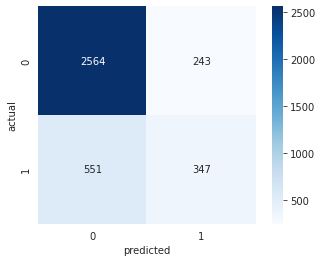

In [107]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [108]:
# Create a performance_auc dict
performance_auc = {}

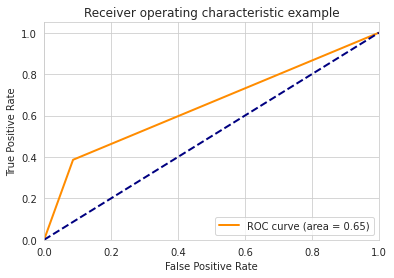

In [109]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
performance_auc['GB'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


<a name="CON"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 7. Modelling CON undersampling</a></dt>
  Cross validation/ Entrenamiento del mejor modelo/ Accuracy score /F-Measure /ROC score

<img src="./img/ml_types.png" alt="drawing" width="650"/>

Repetimos proceso con **undersampling** y comparamos resultados.


In [110]:
X=df1[['city_development_index','años_experiencia_0-5','relev_exp_bin','años_experiencia_+20','education_level_Graduate','last_new_job']]

In [111]:
y = df1['target']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=df['target'])

In [113]:
y_train.value_counts()

0.0    11213
1.0     3605
Name: target, dtype: int64

In [114]:
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [115]:
y_train_under.value_counts()

1.0    3605
0.0    3605
Name: target, dtype: int64

Cross validation.

In [116]:
X_train_under, X_test, y_train_under, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1000)

In [117]:
# vamos a meter mas modelos
models, names = list(), list() 

models.append(LogisticRegression()) 
names.append('LR') 
models.append(KNeighborsClassifier()) 
names.append('KNN') 
models.append( DecisionTreeClassifier()) 
names.append('DT') 
models.append(GaussianNB()) 
names.append('NB') 
models.append(SVC(gamma='auto')) 
names.append('SVC') 
models.append(RandomForestClassifier())
names.append('RF')
models.append(GradientBoostingClassifier())
names.append('GB')


results = list() 

# hacemos el cross validation score,
for model, name in zip(models, names) :
	result = cross_val_score(model, X_train_under, y_train_under, cv=10, scoring="accuracy")
	results.append(result)


In [118]:
for result, name in zip(results, names):
	print("Accuracy of {}: {}".format(name, result.mean()))


Accuracy of LR: 0.7656906055196684
Accuracy of KNN: 0.7509125030412213
Accuracy of DT: 0.7670412722191393
Accuracy of NB: 0.7681875961914343
Accuracy of SVC: 0.7566473577596928
Accuracy of RF: 0.7667712300019772
Accuracy of GB: 0.7837095335336212


In [119]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [120]:
print('Accuracy :       ', accuracy_score(y_test, y_predict))
print('F-Measure :      ', f1_score(y_test, y_predict, average = 'weighted'))
print('ROC Score :      ', roc_auc_score(y_test, y_predict))

Accuracy :        0.7881241565452092
F-Measure :       0.7721857730550674
ROC Score :       0.6545549505174385


In [121]:

# GBC Classifier tuning - ajuste de Hyperparámetros
model_2 = GradientBoostingClassifier()

# Ajuste de parámetros
gb_param_grid = {"loss": ["deviance"], # Deviance suele ir mejor.
                          "learning_rate": [0.05, 0.1, 0.2],  # Cuanto más alto, mas aporta cada nuevo arbol
                          
                          "n_estimators": [20,50,100], # Cuidado con poner muchos estiamdores ya que vamos a
                                                           # sobreajustar el modelo
                          
                          "max_depth": [1,3,5], # No es necesario poner una profundiad muy alta. Cada nuevo
                                                    # arbol va corrigiendo el error de los anteriores.
                          
                          
                          "max_features": ["sqrt", 3, 4], # Igual que en el random forest
                          }

# Creamos el gridSearchCV
gsGBC = GridSearchCV(model_2, param_grid=gb_param_grid, cv=10,
                     scoring='accuracy', n_jobs=4, verbose=1)

# Ajustamos al modelo
gsGBC.fit(X_train, y_train)

y_predict = gsGBC.predict(X_test)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [122]:
print('Accuracy :       ', accuracy_score(y_test, y_predict))
print('F-Measure :      ', f1_score(y_test, y_predict, average = 'weighted'))
print('ROC Score :      ', roc_auc_score(y_test, y_predict))

Accuracy :        0.7892037786774629
F-Measure :       0.7753275229416602
ROC Score :       0.6617047898865626


<a name="Final"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 8. CONCLUSION</a></dt>
  

<img src="./img/ml_types.png" alt="drawing" width="650"/>


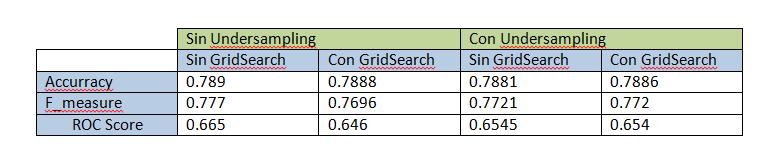

Como podemos comprobar el mejor algortimo ha sido GradientBoosting, y con muy poca diferencia los mejores resultados los obtenemos sin hacer undersampling y sin definir los hyperparámetros.

In [123]:
# REALIZO LOS SIGUIENTES PASOS PARA PODER HACER LA PREDICCIÓN.

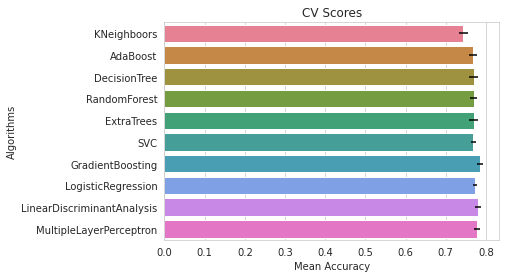

In [124]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 17

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [125]:
# GBC Classifier tuning - ajuste de Hyperparámetros
GBC = GradientBoostingClassifier()

# Ajuste de parámetros
gb_param_grid = {
    'loss': ['deviance', 'exponential'],
    'n_estimators' : [25, 50],
    'learning_rate': [ 0.05, 1],
    'max_depth': [3, 7],
    'min_samples_leaf': [25, 100],
    'max_features': [ 0.3]

}

# Creamos el gridSearchCV
gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=K_fold,
                     scoring='accuracy', n_jobs=4, verbose=1)

# Ajustamos al modelo
gsGBC.fit(X_train, y_train)

# Extrae el mejor resultado
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


0.7860712525092922

In [126]:
VotingPredictor = VotingClassifier(estimators =
                            [('gbc', GBC_best)],
                           voting='soft', n_jobs = 4)

# Utilizamos el mejor resultado en nuestro modelo
VotingPredictor = VotingPredictor.fit(X_train, y_train)

<a name="prediccion"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 9. PREDICCION</a></dt>

In [127]:
model=GradientBoostingClassifier()

In [128]:
# hago la predicción con el dataset de test, donde no se encuentra la variable Y.
df_test= pd.read_csv('aug_test.csv')

In [129]:
df_test.drop(['company_type', 'company_size','gender','enrolled_university','city','training_hours','major_discipline'], axis = 'columns', inplace=True)

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city_development_index  2129 non-null   float64
 2   relevent_experience     2129 non-null   object 
 3   education_level         2077 non-null   object 
 4   experience              2124 non-null   object 
 5   last_new_job            2089 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 99.9+ KB


In [131]:
# Detección de los valores nulos por variables.

null_count = df_test.isnull().sum()
null_percentage = round((df_test.isnull().sum()/df_test.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df_test.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
3,education_level,52,2.44
5,last_new_job,40,1.88
4,experience,5,0.23
0,enrollee_id,0,0.00
1,city_development_index,0,0.00
2,relevent_experience,0,0.00


### Rellenamos los valores nulos de Test

education_level

In [132]:
df_test['education_level'].fillna('High School', inplace=True)

last_new_job

In [133]:
df_test['last_new_job'].fillna('never', inplace=True)

In [134]:
df_test["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [135]:
df_test["last_new_job"] = pd.to_numeric(df["last_new_job"])

In [136]:
df_test["last_new_job"].isna().sum()

50

experience

In [137]:
df_test['experience'].fillna("0", inplace=True)

In [138]:
df_test["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [139]:
df_test["experience"] = pd.to_numeric(df_test["experience"])

In [140]:
df_test["experience"].dtypes

dtype('int64')

In [141]:
# Realizamos la discretización del atributo Experience con pd.cut y bins / labels a medida
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df_test['años_experiencia'] = pd.cut(df_test["experience"], bins=bins, labels=labels)

In [142]:
# Eliminamos columnas ya discretizadas,  para no  repetirlas.
df_test.drop(['experience'], axis=1,inplace=True)

Otros

In [143]:
df_test['relev_exp_bin'] = df_test['relevent_experience']
df_test = df_test.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})

Drop Nan

In [144]:
df_test.dropna(inplace=True)

In [145]:
# get dummies
categorical_feature = (df_test.dtypes == "category") | (df_test.dtypes == object)
categorical_cols = df_test.columns[categorical_feature].tolist()
df_test = pd.get_dummies(df_test, columns=categorical_cols)

In [146]:
# data estandarizacion
cols_to_standarize = ['last_new_job']
for col in cols_to_standarize:
  df_test[col] = preprocessing.scale(df_test[col], axis=0, copy=False)

In [147]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2128
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  2000 non-null   int64  
 1   city_development_index                       2000 non-null   float64
 2   last_new_job                                 2000 non-null   float64
 3   relev_exp_bin                                2000 non-null   int64  
 4   relevent_experience_Has relevent experience  2000 non-null   uint8  
 5   relevent_experience_No relevent experience   2000 non-null   uint8  
 6   education_level_Graduate                     2000 non-null   uint8  
 7   education_level_High School                  2000 non-null   uint8  
 8   education_level_Masters                      2000 non-null   uint8  
 9   education_level_Phd                          2000 non-null   uint8  
 10  

definimos X e Y en TEST

In [148]:
df_test = df_test.drop(columns = ['education_level_High School','education_level_Masters','education_level_Phd','education_level_Primary School'])

In [149]:
validations_cols = X_train.columns.values.tolist()
validation = df_test[validations_cols]

In [150]:
df_test.shape

(2000, 12)

In [151]:
validation.shape

(2000, 6)

In [152]:
df_test

,enrollee_id,city_development_index,last_new_job,relev_exp_bin,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,education_level_Graduate,años_experiencia_0-5,años_experiencia_5-10,años_experiencia_10-15,años_experiencia_15-20,años_experiencia_+20
0,32403,0.827,-0.569687,1,1,0,1,0,1,0,0,0
1,9858,0.920,1.813942,1,1,0,1,1,0,0,0,0
4,27724,0.920,1.218035,1,1,0,1,0,0,0,0,1
5,217,0.899,-0.569687,0,0,1,0,0,1,0,0,0
7,27302,0.920,1.813942,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2123,21339,0.624,-1.165595,0,0,1,0,1,0,0,0,0
2124,1289,0.920,-0.569687,0,0,1,1,0,0,0,1,0
2126,31762,0.887,-0.569687,0,0,1,0,1,0,0,0,0
2127,7873,0.804,0.622127,1,1,0,0,0,1,0,0,0


In [153]:
ids = df_test['enrollee_id']
df_test.drop('enrollee_id', axis=1, inplace=True)

In [154]:
# Realizando la predicción al conjunto de datos de validación
data_val = VotingPredictor.predict(validation)

In [155]:
submission = pd.DataFrame({
    'Worker_ID' :ids,
    'Jobseeker': data_val
})

In [156]:
submission.to_csv("mysubmission.csv", index=False)